In [1]:
import tsfresh as ts
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ts.__version__

'0.18.0'

In [3]:
def normalize(v):
    mx=v.max()
    mn=v.min()
    rng = mx-mn
    return v.apply(lambda x: (2*(x-mn)/rng)-1)

In [4]:
X = pd.read_csv("/home/lpalum/Downloads/X.csv",index_col=0)
X['duration_mins']=normalize(X['duration_mins'])
X['dpf_regen_needed_duration_mins']=normalize(X['dpf_regen_needed_duration_mins'])
X=X[['id','time','duration_mins','dpf_regen_needed_duration_mins']]
X.columns = ['id','time','F1','F2']

FileNotFoundError: [Errno 2] No such file or directory: '/home/lpalum/Downloads/X.csv'

In [5]:
y = pd.read_csv("/home/lpalum/Downloads/y.csv", index_col='platform_id', squeeze=True).rename_axis('id')
y = pd.Series(y.values,index=y.index.values)

In [6]:
X.describe()

,id,time,F1,F2
count,1.458000e+03,1458.000000,1458.000000,1458.000000
mean,5.315254e+06,365.000000,-0.475766,-0.974915
std,5.007521e+06,210.516181,0.440493,0.108166
min,3.094500e+05,1.000000,-1.000000,-1.000000
25%,3.094500e+05,183.000000,-0.965146,-1.000000
50%,5.315254e+06,365.000000,-0.509849,-1.000000
75%,1.032106e+07,547.000000,-0.211896,-1.000000
max,1.032106e+07,729.000000,1.000000,1.000000


In [7]:
y.head()

309450       True
10321057    False
dtype: bool

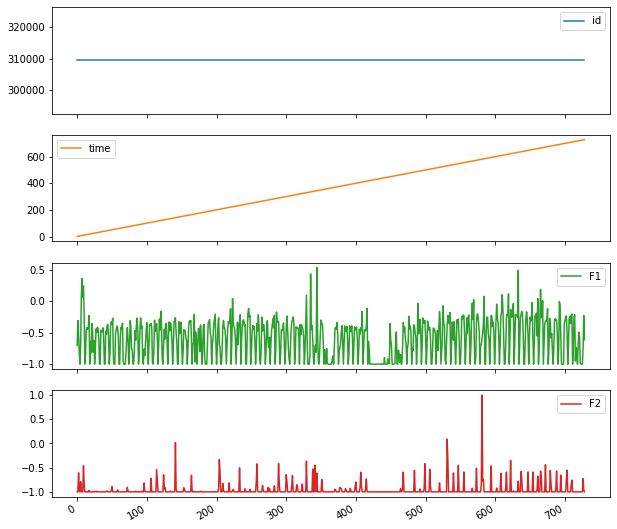

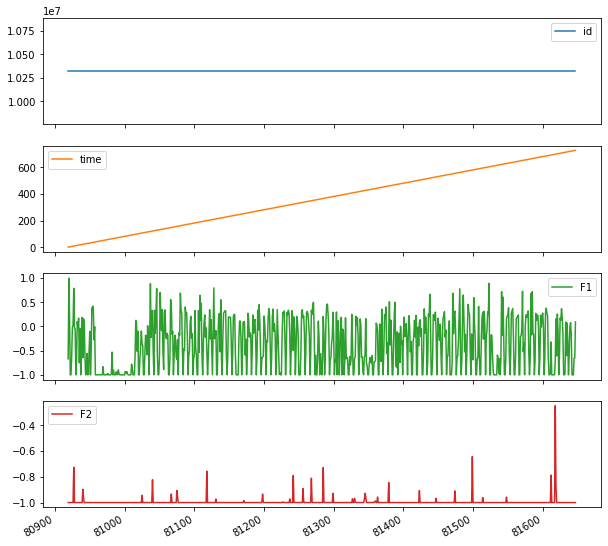

In [8]:
for i in X['id'].unique():
    X[X['id'] == i].plot(subplots=True, sharex=True, figsize=(10,10))
    plt.show()

In [9]:
extracted_features=ts.extract_features(X, column_id="id", column_sort="time")
extracted_features.head()

Feature Extraction: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]


,F2__variance_larger_than_standard_deviation,F2__has_duplicate_max,F2__has_duplicate_min,F2__has_duplicate,F2__sum_values,F2__abs_energy,F2__mean_abs_change,F2__mean_change,F2__mean_second_derivative_central,F2__median,...,F1__permutation_entropy__dimension_5__tau_1,F1__permutation_entropy__dimension_6__tau_1,F1__permutation_entropy__dimension_7__tau_1,F1__query_similarity_count__query_None__threshold_0.0,"F1__matrix_profile__feature_""min""__threshold_0.98","F1__matrix_profile__feature_""max""__threshold_0.98","F1__matrix_profile__feature_""mean""__threshold_0.98","F1__matrix_profile__feature_""median""__threshold_0.98","F1__matrix_profile__feature_""25""__threshold_0.98","F1__matrix_profile__feature_""75""__threshold_0.98"
309450,0.0,0.0,1.0,1.0,-696.694060,681.171828,0.072277,0.0,-0.000027,-1.0,...,4.168253,5.302075,6.092412,NaN,0.961483,4.411008,2.379931,2.237500,1.937064,2.669420
10321057,0.0,0.0,1.0,1.0,-724.731628,721.643603,0.010879,0.0,0.000000,-1.0,...,4.241651,5.409057,6.136581,NaN,0.808786,3.552518,2.156778,2.166751,1.785437,2.530921


In [10]:
impute(extracted_features)
extracted_features.head()

/home/lpalum/miniconda3/envs/dsas/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['F2__friedrich_coefficients__coeff_0__m_3__r_30'
 'F2__friedrich_coefficients__coeff_1__m_3__r_30'
 'F2__friedrich_coefficients__coeff_2__m_3__r_30'
 'F2__friedrich_coefficients__coeff_3__m_3__r_30'
 'F2__max_langevin_fixed_point__m_3__r_30'
 'F2__query_similarity_count__query_None__threshold_0.0'
 'F1__friedrich_coefficients__coeff_0__m_3__r_30'
 'F1__friedrich_coefficients__coeff_1__m_3__r_30'
 'F1__friedrich_coefficients__coeff_2__m_3__r_30'
 'F1__friedrich_coefficients__coeff_3__m_3__r_30'
 'F1__max_langevin_fixed_point__m_3__r_30'
 'F1__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


,F2__variance_larger_than_standard_deviation,F2__has_duplicate_max,F2__has_duplicate_min,F2__has_duplicate,F2__sum_values,F2__abs_energy,F2__mean_abs_change,F2__mean_change,F2__mean_second_derivative_central,F2__median,...,F1__permutation_entropy__dimension_5__tau_1,F1__permutation_entropy__dimension_6__tau_1,F1__permutation_entropy__dimension_7__tau_1,F1__query_similarity_count__query_None__threshold_0.0,"F1__matrix_profile__feature_""min""__threshold_0.98","F1__matrix_profile__feature_""max""__threshold_0.98","F1__matrix_profile__feature_""mean""__threshold_0.98","F1__matrix_profile__feature_""median""__threshold_0.98","F1__matrix_profile__feature_""25""__threshold_0.98","F1__matrix_profile__feature_""75""__threshold_0.98"
309450,0.0,0.0,1.0,1.0,-696.694060,681.171828,0.072277,0.0,-0.000027,-1.0,...,4.168253,5.302075,6.092412,0.0,0.961483,4.411008,2.379931,2.237500,1.937064,2.669420
10321057,0.0,0.0,1.0,1.0,-724.731628,721.643603,0.010879,0.0,0.000000,-1.0,...,4.241651,5.409057,6.136581,0.0,0.808786,3.552518,2.156778,2.166751,1.785437,2.530921


In [11]:
features_filtered = select_features(extracted_features, y)
features_filtered.head()

""
309450
10321057


In [12]:
ts.extract_relevant_features(X, y, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


""
309450
10321057


## Run the example

In [13]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [14]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [15]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

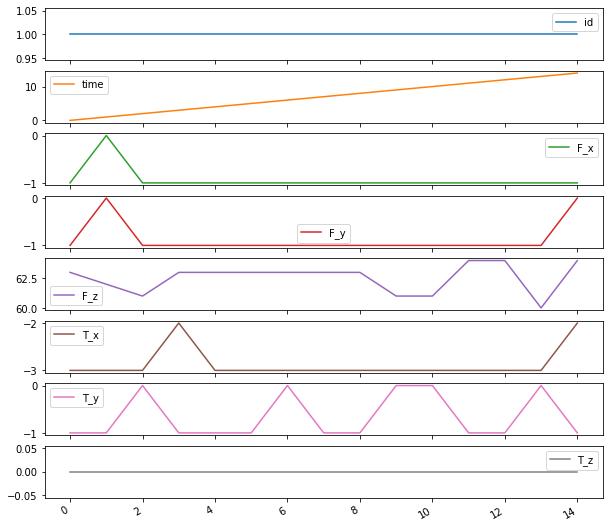

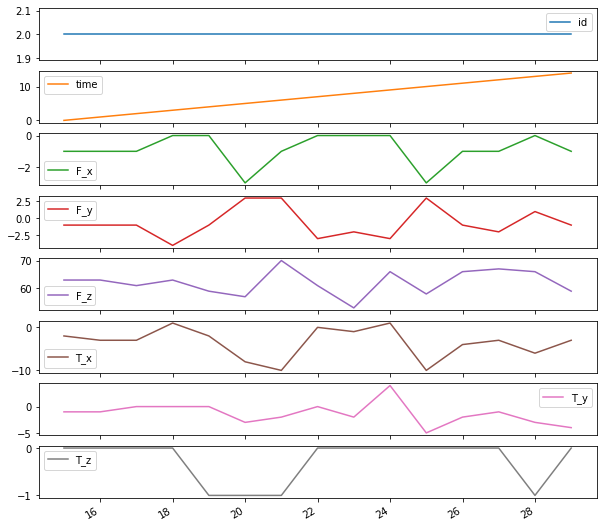

In [16]:
for i in timeseries['id'].unique()[0:2]:
    timeseries[timeseries['id'] == i].plot(subplots=True, sharex=True, figsize=(10,10))
    plt.show()

In [17]:
extracted_features=ts.extract_features(timeseries, column_id="id", column_sort="time")
extracted_features.head()

Feature Extraction: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.540306,1.748067,1.831020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.019815,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.271869,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
impute(extracted_features)
extracted_features.head()

/home/lpalum/miniconda3/envs/dsas/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.540306,1.748067,1.831020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.019815,2.163956,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.271869,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
features_filtered = select_features(extracted_features, y)
features_filtered.head()

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,0.966092,15.0,13.0,0.930949,0.471405,0.222222,1.000000,1.165352,...,0.0,0.0,-3.0,1.0,-0.310265,-0.751682,-1.0,-596.000000,-1.0,-1.0
2,7.0,25.0,1.290994,13.0,76.0,2.250926,2.054805,4.222222,0.624118,6.020261,...,0.0,1.0,-9.2,1.0,-0.202951,0.057818,-3.6,-680.384615,-1.0,-1.0
3,11.0,12.0,0.894427,14.0,40.0,1.632993,1.768867,3.128889,2.203858,8.235442,...,0.0,3.0,-6.6,0.0,0.539121,0.912474,-4.0,-617.000000,-1.0,0.0
4,5.0,16.0,1.032796,10.0,60.0,2.000000,2.669998,7.128889,0.844394,12.067855,...,0.0,0.0,-9.0,0.0,-2.641390,-0.609735,-4.6,3426.307692,-1.0,1.0
5,9.0,17.0,1.064581,13.0,46.0,1.751190,2.039608,4.160000,2.730599,6.445330,...,0.0,0.0,-9.6,0.0,0.591927,0.072771,-5.0,-2609.000000,-1.0,0.8


In [ ]:
ts.extract_relevant_features(timeseries, y, column_id='id', column_sort='time')

Feature Extraction:  80%|████████  | 8/10 [00:07<00:01,  1.17it/s]